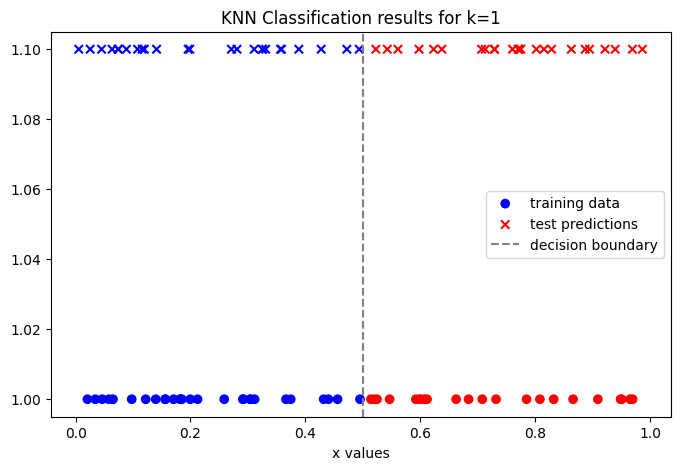

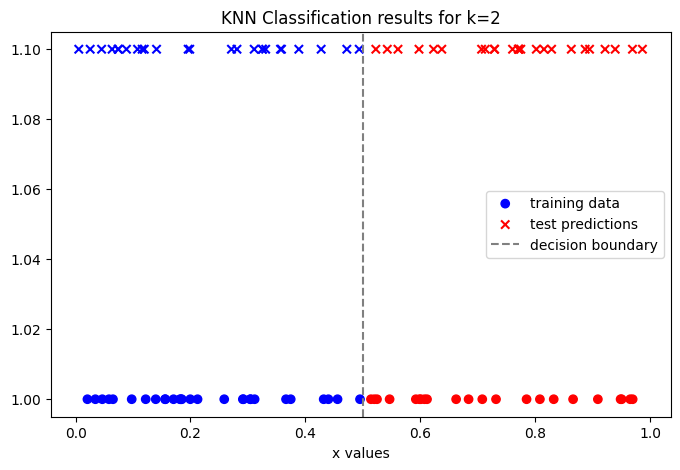

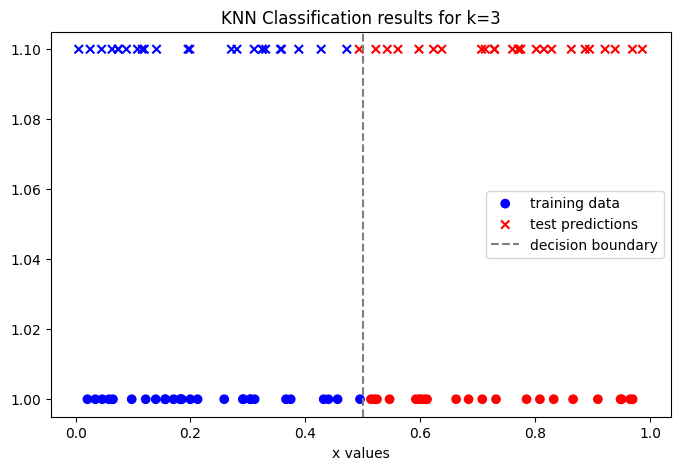

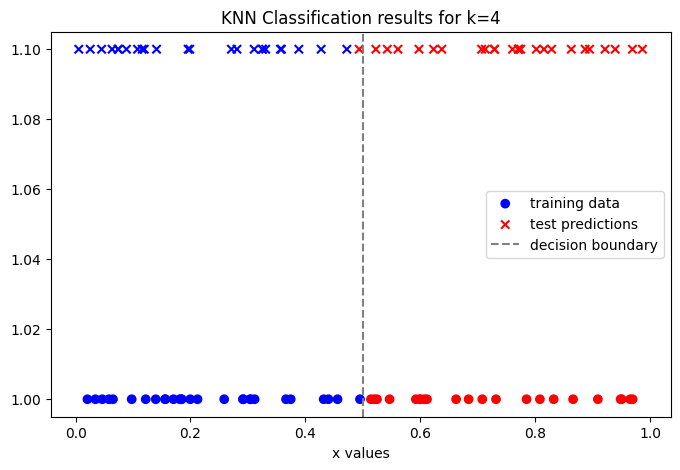

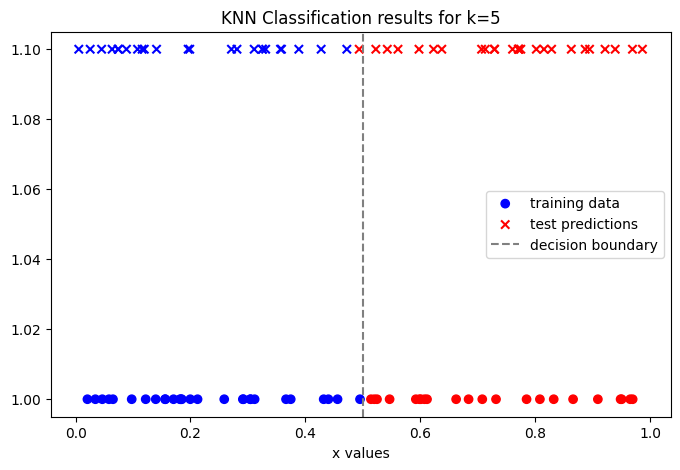

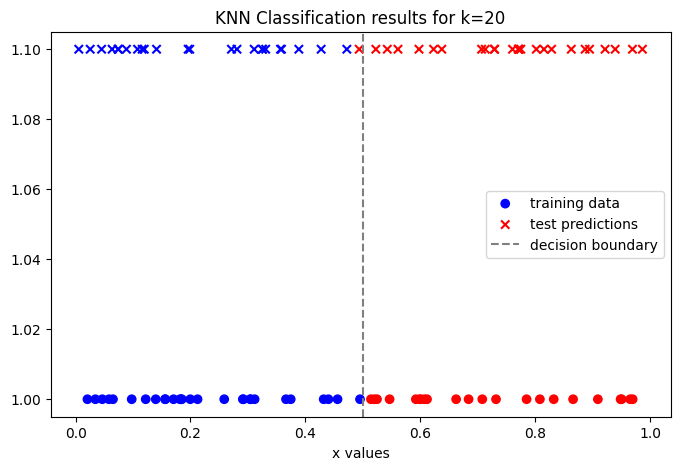

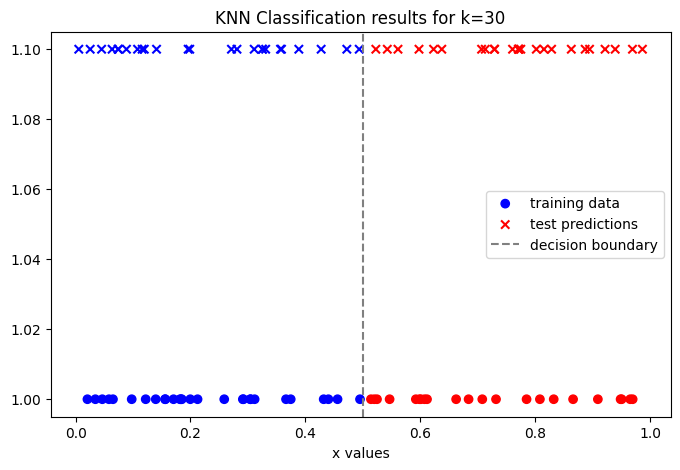

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
def generate_data():
	np.random.seed(42)
	x=np.random.rand(100)
	labels=np.array(["class1" if xi<= 0.5 else "class2" for xi in x[:50]])
	return x,labels
def knn_classify(train_x, train_y, test_x, k):
    predictions = []
    for test_point in test_x:
        distances = np.abs(train_x - test_point)
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = train_y[nearest_indices]
        most_common_label = Counter(nearest_labels).most_common(1)[0][0]
        predictions.append(most_common_label)
    return np.array(predictions)
def plot_results(x,train_x,train_y,predictions,k):
	plt.figure(figsize=(8,5))
	plt.scatter(train_x,[1]*len(train_x),c=["blue" if label=="class1" else "red" for label in train_y],label='training data',marker='o')
	plt.scatter(x[50:],[1.1]*len(predictions),c=["blue" if label=="class1" else "red" for label in predictions],label='test predictions',marker='x')
	plt.axvline(0.5,color='grey',linestyle='--',label='decision boundary')
	plt.legend()
	plt.title(f'KNN Classification results for k={k}')
	plt.xlabel('x values')
	plt.show()
x,labels=generate_data()
train_x,train_y=x[:50],labels
test_x=x[50:]
k_values=[1,2,3,4,5,20,30]
for k in k_values:
	predictions=knn_classify(train_x,train_y,test_x,k)
	plot_results(x,train_x,train_y,predictions,k)